In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df = df.drop(['Unnamed: 0','label'], axis=1)

In [6]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [8]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [10]:
df.duplicated().sum()

178

In [11]:
dp = df.duplicated()
duplicated = df[dp]
duplicated_sorted = duplicated.sort_values(by=['text'])

In [12]:
duplicated_sorted.head(10)

,text,label_num
182,Subject: \r\n,1
296,Subject: \r\n,1
363,Subject: \r\n,1
2538,Subject: \r\n,1
2665,Subject: \r\n,1
2680,Subject: \r\n,1
1369,Subject: \r\n,1
4748,Subject: \r\n,1
2903,Subject: \r\n,1
4081,Subject: \r\n,1


In [13]:
df_cleaned = df.drop_duplicates()

In [14]:
df_cleaned.shape

(4993, 2)

In [15]:
df['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [16]:
# Data Preprocessing

# Convert text to lowercase → Ensures uniformity.
# Remove email addresses, URLs, and numbers → Spammers often use links and numbers in messages.
# Remove special characters and punctuation → Cleans unnecessary symbols like @, #, $, %.
# Remove stopwords → Reduces common words that don’t contribute to spam detection.
# Tokenization → Splits email text into words.
# Apply stemming or lemmatization → Converts words to their base form (better for pattern recognition).
# Detect and remove repeated characters → Spammers often use "Frrreeee" instead of "Free".
# Vectorization (TF-IDF or Word Embeddings) → Converts text into numerical form for ML models.

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')  
nltk.download('stopwords') 
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.stem.PorterStemmer()

def preprocess_email(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove email addresses
    text = re.sub(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Apply stemming
    words = [stemmer.stem(word) for word in words]

    # Remove repeated characters (e.g., "Frrreeee" → "Free")
    words = [re.sub(r'(.)\1+', r'\1\1', word) for word in words]

    # Convert list of words back to text
    return ' '.join(words)

In [20]:
df_final = df_cleaned

In [21]:
df_final['text'] = df_final['text'].apply(preprocess_email)

C:\Users\hamad\AppData\Local\Temp\ipykernel_12868\186697701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['text'] = df_final['text'].apply(preprocess_email)


In [22]:
df_final.head()

,text,label_num
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom januari see attach file hplnol...,0
2,subject neon retreat ho ho ho around wonder ti...,0
3,subject photoshop window offic cheap main tren...,1
4,subject indian spring deal book teco pvr reven...,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_final['text'], df_final['label_num'], random_state=42, stratify=df_final['label_num'])

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3744,), (1249,), (3744,), (1249,))

In [25]:
tfid = TfidfVectorizer(max_features=20000)

X_train_tf = tfid.fit_transform(X_train)
X_test_tf = tfid.transform(X_test)

In [26]:
X_train_tf.shape

(3744, 20000)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [28]:
mNB = MultinomialNB()
mNB.fit(X_train_tf, y_train)

y_train_pred = mNB.predict(X_train_tf)
print('Train Accuracy: ')
print(accuracy_score(y_train, y_train_pred))

print('Test Accuracy: ')
y_test_pred = mNB.predict(X_test_tf)
print(accuracy_score(y_test, y_test_pred))

Train Accuracy: 
0.9764957264957265
Test Accuracy: 
0.9463570856685348


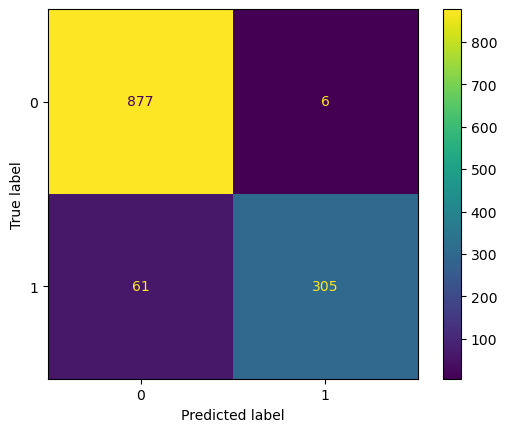

In [29]:
cm_nb = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    n_estimators=1000,     
    criterion='gini',
    max_depth=70,    
    random_state=40,
    n_jobs=-1,
)

RF.fit(X_train_tf, y_train)


RandomForestClassifier(max_depth=70, n_estimators=1000, n_jobs=-1,
                       random_state=40)

In [31]:
y_train_RF = RF.predict(X_train_tf)
print(accuracy_score(y_train, y_train_RF))

y_test_RF = RF.predict(X_test_tf)
print(accuracy_score(y_test, y_test_RF))

0.9981303418803419
0.9727782225780625


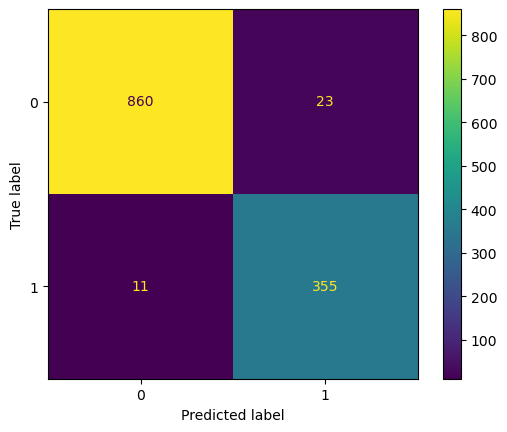

In [32]:
cm_RF = confusion_matrix(y_test, y_test_RF)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot()